Return % by Category:
 category
Clothing           0.361531
Beauty             0.156746
Toys               0.144380
furniture          0.120361
school products    0.119588
Name: return_flag, dtype: float64 

Return % by Supplier:
 supplier
will      0.250149
kishan    0.148609
jack      0.141544
Name: return_flag, dtype: float64 



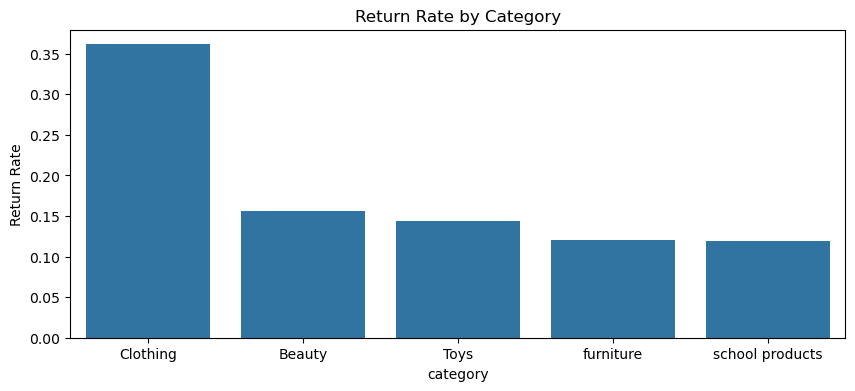

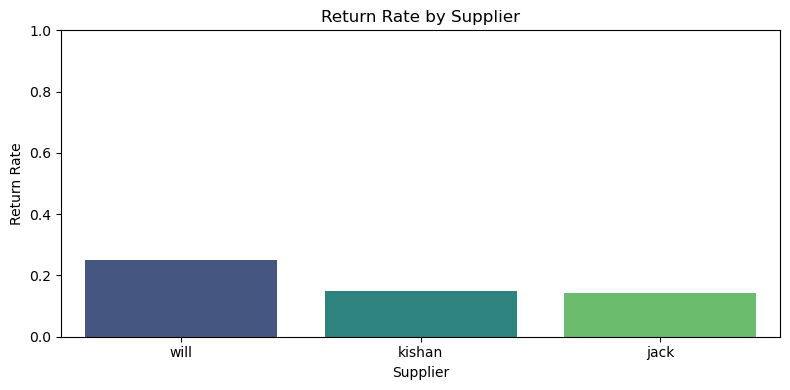


Model Performance:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1248
           1       0.46      0.04      0.08       252

    accuracy                           0.83      1500
   macro avg       0.65      0.52      0.49      1500
weighted avg       0.77      0.83      0.77      1500

✅ Data exported to 'return_risk.csv'


In [7]:
import pandas as pd
import numpy as np
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns


random.seed(42)
np.random.seed(42)


num_orders = 5000
categories = ['furniture', 'Clothing', 'school products', 'Beauty', 'Toys']
suppliers = ['jack', 'will', 'kishan']
regions = ['North', 'South', 'East', 'West']
channels = ['Email', 'Social Media', 'SEO', 'Paid Ads']


orders = pd.DataFrame({
    'order_id': np.arange(1, num_orders + 1),
    'product_id': np.random.randint(1000, 9999, num_orders),
    'customer_id': np.random.randint(1, 2000, num_orders),
    'category': np.random.choice(categories, num_orders),
    'supplier': np.random.choice(suppliers, num_orders),
    'region': np.random.choice(regions, num_orders),
    'channel': np.random.choice(channels, num_orders),
})


def simulate_return(row):
    score = 0.1  # base return rate
    if row['category'] == 'Clothing':
        score += 0.2
    if row['supplier'] == 'will':
        score += 0.1
    if row['channel'] == 'Paid Ads':
        score += 0.05
    return np.random.rand() < score

returns = pd.DataFrame({
    'order_id': orders['order_id'],
    'return_flag': orders.apply(simulate_return, axis=1).astype(int)
})

df = pd.merge(orders, returns, on='order_id')


category_returns = df.groupby('category')['return_flag'].mean().sort_values(ascending=False)
supplier_returns = df.groupby('supplier')['return_flag'].mean().sort_values(ascending=False)

print("Return % by Category:\n", category_returns, "\n")
print("Return % by Supplier:\n", supplier_returns, "\n")

plt.figure(figsize=(10, 4))
sns.barplot(x=category_returns.index, y=category_returns.values)
plt.title("Return Rate by Category")
plt.ylabel("Return Rate")
plt.show()


plt.figure(figsize=(8, 4))
sns.barplot(x=supplier_returns.index, y=supplier_returns.values, hue=supplier_returns.index, palette="viridis", dodge=False, legend=False)
plt.title("Return Rate by Supplier")
plt.ylabel("Return Rate")
plt.xlabel("Supplier")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


X = pd.get_dummies(df[['category', 'supplier', 'region', 'channel']], drop_first=True)
y = df['return_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\nModel Performance:\n", classification_report(y_test, y_pred))

# Add return probability
df['return_risk_score'] = model.predict_proba(X)[:, 1]


df.to_csv("return_risk.csv", index=False)
print("✅ Data exported to 'return_risk.csv'")